# Morelet-Wavelet MCM2017 June26-30

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
plt.rcParams.update({'font.size': 15})

Defining directory for csv data

In [2]:
files=r'C:\Users\Kenne\Desktop\MCM5DayJune2017'

Reading in data (main file (2x2 array) followed by axis and boundary data:

In [3]:
wavelet_path=files+r'\power.csv'
x_path=files+r'\time.csv'
y_path=files+r'\period.csv'
bound_path=files+r'\cutoff.csv'
zenith_path=files+r'\zenith5pix.csv'

x_data=pd.read_csv(x_path)
x_data=x_data.values
y_data=pd.read_csv(y_path)
y_data=y_data.values
bound_data=pd.read_csv(bound_path)
bound_data=bound_data.values
zenith_data=pd.read_csv(zenith_path)
zenith_data=zenith_data.values
wavelet_data=pd.read_csv(wavelet_path)
wavelet_data=wavelet_data.values

In [4]:
np.shape(zenith_data)

(1439, 2)

Creating contour levels for plotting and taking log10 of power spectrum with min-max range of 2-order magnitude.

In [5]:
levels=np.linspace(1.0,np.max((wavelet_data[:,:-1])),20)

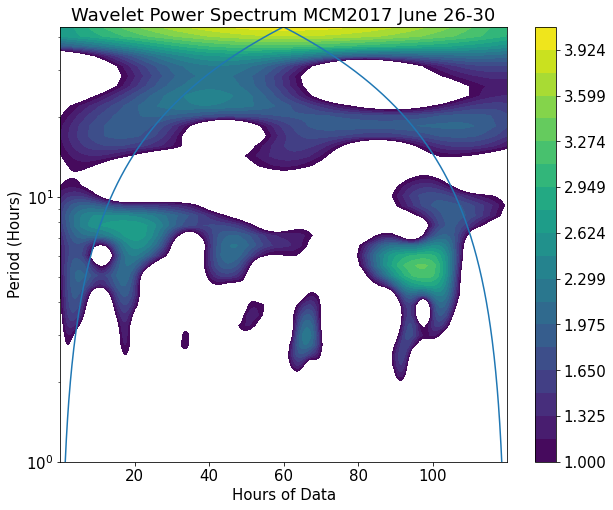

In [6]:
plt.figure(figsize=(10,8))
plt.title('Wavelet Power Spectrum MCM2017 June 26-30')
plt.xlabel('Hours of Data')
plt.ylabel('Period (Hours)')
plt.ylim(1,np.max((bound_data)))
plt.contourf(x_data[:,0],(y_data[:,0]),(wavelet_data[:,:-1]), levels)
plt.plot(x_data[:,0],(bound_data))
plt.yscale('log')
plt.colorbar()

Mean-subtracted Zenith temperature of AMTM temperature maps using the average of 5-width (25) center pixels.

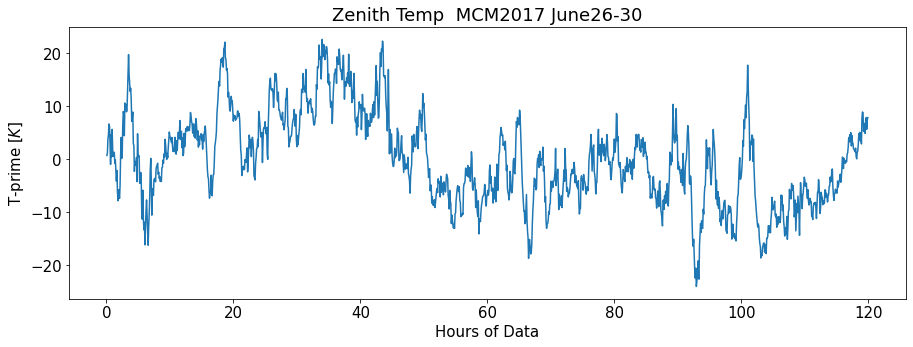

In [7]:
plt.figure(figsize=(15,5))
plt.title('Zenith Temp  MCM2017 June26-30')
plt.xlabel('Hours of Data')
plt.ylabel('T-prime $[K]$')
#plt.plot(zenith_data[:,0],zenith_data[:,1])
plt.plot(zenith_data[:,0],zenith_data[:,1]-np.mean(zenith_data[:,1]))


C:\Users\kenne\AppData\Local\Temp/ipykernel_2828/3905899247.py:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(5.0/60.0/freq,(np.abs(sp.real)**2))


(0.0, 12.0)

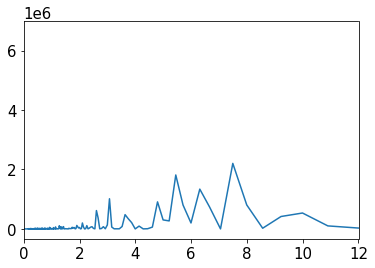

In [11]:
t = x_data[:,0]
sp = np.fft.fft(zenith_data[:,1])
freq = np.fft.fftfreq(np.size(t))
plt.plot(5.0/60.0/freq,(np.abs(sp.real)**2))
plt.xlim(0,12)